In [44]:
 #coding: utf-8

# In[133]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

In [45]:

def Time_Access(data):
    """process with time columns"""
    colHead = data.columns.values.tolist()
    #print colHead
    if 'date' not in colHead:
        print "date is no exit"
        return None
    else:
        date = []
        for no in range(len(data['date'])):
            date.append(dt.datetime.strptime(data['date'][no], "%Y-%m-%d %H:%M:%S"))
        date_list = []
        for d in date:
            temp = []
            temp.append(d.year)
            temp.append(d.month)
            temp.append(d.day)
            temp.append(d.hour)
            temp.append(d.minute)
            temp.append(d.second)
            date_list.append(temp)
        #print date_list
        
        del data['date']
        date_frame = pd.DataFrame(date_list,columns = ['year','month','day','hour','minute','second'])
        #print data
        result = pd.concat([date_frame,data],axis = 1)
        #print result
        return result
        


In [46]:
# In[146]:

from sklearn import preprocessing
def Get_Label(data,label):
    colHead = data.columns.values.tolist()
    if label not in colHead:
        label = label + "is no exit"
        print label
        return None,None
    else:
        label_list = data[label]
        del data[label]
        train_x = np.array(data)
        train_x = preprocessing.scale(train_x)  #x ~N(0,1)
        label_x = np.array(label_list)
        #print data
        return train_x,label_x


In [67]:
from sklearn.neural_network import MLPRegressor
def NN_Model(train_x,train_y):
    NN = MLPRegressor(hidden_layer_sizes=(50,),activation='relu',solver='adam',alpha=0.0001,batch_size='auto',learning_rate='adaptive', 
             learning_rate_init=0.001)
    NN.fit(train_x,train_y)
    
    return NN
 
   


In [70]:
def pre_plot(train_y,pre_result, start, end):
    train_y = pd.DataFrame(train_y[start:end],columns=['train_y'])
    pre_result = pd.DataFrame(pre_result[start:end],columns=['pre_result'])
    result = pd.concat([train_y,pre_result],axis=1)
    print result
    result.plot()
    plt.show()
    


     train_y  pre_result
0       0.01   -0.051991
1       0.02   -0.037238
2       0.00   -0.097527
3       0.00   -0.073564
4      -0.12   -0.122378
5       0.03   -0.040402
6      -0.03   -0.115838
7      -0.04   -0.071361
8       0.00   -0.046850
9      -0.03   -0.040587
10     -0.03    0.024088
11      0.05    0.083749
12     -0.09   -0.071618
13     -0.04    0.037828
14     -0.03   -0.000354
15      0.07    0.118785
16      0.02    0.049779
17     -0.02    0.003393
18      0.00    0.005889
19      0.10    0.118534
20      0.00   -0.031863
21      0.02   -0.009882
22     -0.05   -0.068777
23     -0.02    0.039416
24      0.06    0.102147
25     -0.07   -0.059148
26     -0.07   -0.005829
27      0.07    0.117255
28      0.00   -0.026525
29      0.00    0.013504
..       ...         ...
253     0.01    0.034178
254     0.00    0.001304
255     0.00    0.090030
256     0.00    0.108301
257    -0.04   -0.021479
258     0.00    0.087682
259     0.00    0.048033
260     0.03    0.040945


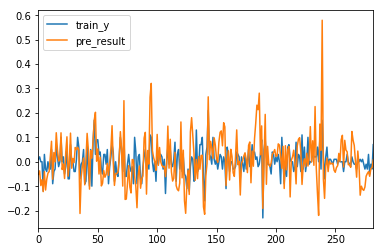

    train_y  pre_result
0      0.01   -0.051991
1      0.02   -0.037238
2      0.00   -0.097527
3      0.00   -0.073564
4     -0.12   -0.122378
5      0.03   -0.040402
6     -0.03   -0.115838
7     -0.04   -0.071361
8      0.00   -0.046850
9     -0.03   -0.040587
10    -0.03    0.024088
11     0.05    0.083749
12    -0.09   -0.071618
13    -0.04    0.037828
14    -0.03   -0.000354
15     0.07    0.118785
16     0.02    0.049779
17    -0.02    0.003393
18     0.00    0.005889
19     0.10    0.118534
20     0.00   -0.031863
21     0.02   -0.009882
22    -0.05   -0.068777
23    -0.02    0.039416
24     0.06    0.102147
25    -0.07   -0.059148
26    -0.07   -0.005829
27     0.07    0.117255
28     0.00   -0.026525
29     0.00    0.013504
..      ...         ...
70     0.05    0.050286
71    -0.04   -0.099672
72     0.10    0.250185
73    -0.06   -0.154370
74    -0.06   -0.152642
75    -0.01   -0.088086
76     0.03   -0.015916
77    -0.02   -0.103391
78    -0.04   -0.127767
79    -0.02    0

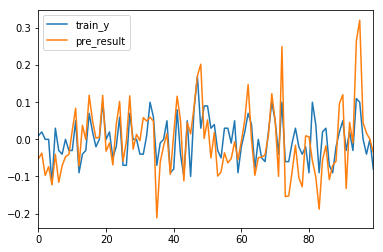

Object `mae` not found.


In [72]:
if __name__ == "__main__":
    shares = pd.read_csv("000001.csv")
    data = Time_Access(shares)
    label = 'price_change'
    train_x,train_y = Get_Label(data,label)
    NN = NN_Model(train_x,train_y)
    predict_result = []
    
    for i in range(len(train_y)):
        predict_result.append(NN.predict([train_x[i]]))
    #print train_x
    #print train_y
    start = 0
    end = len(train_y)
    pre_plot(train_y,predict_result,start,end)
    pre_plot(train_y,predict_result,0,100)
    pct = pd.concat([train_y,pre_re])
    
    data
    
